<a href="https://colab.research.google.com/github/Ji-YoungHyun/TEST1/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
# https://twinw.tistory.com/252
# https://www.tensorflow.org/tutorials/images/classification?hl=ko#%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8%ED%95%98%EA%B8%B0

In [ ]:
pip install -q tensorflow tensorflow-datasets

## Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

import PIL
import PIL.Image
import cv2

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Load Data



In [ ]:
import pathlib

file_path = pathlib.Path('/content/drive/MyDrive/Capstone/data/')
file_path = list(file_path.glob('*/*'))
print(file_path)

[]


IndexError: ignored

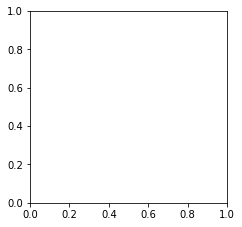

In [ ]:
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(file_path[i]))
    plt.title(os.path.basename(file_paths[i]))
    plt.axis('off')
plt.show()

## Make Dataset

In [ ]:
groups_folder_path = '/content/drive/MyDrive/Capstone/data/'
categories = ["a", "ae", "b", "ch", "d", "e", "eo", "eu", "g", "h",
              "i", "j", "k", "m", "n", "ng", "o","oe", "p", "r",
              "s", "t", "u", "ui", "wi", "ya", "yae", "ye", "yeo", "yo", "yu"]
 
num_classes = len(categories)
  
image_w = 150
image_h = 150
  
X = []
Y = []

In [ ]:
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
            X.append(img/256)
            Y.append(label)

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)

In [ ]:
np.save("./img_data.npy", xy)

In [ ]:
np.save("/content/drive/MyDrive/Capstone/img_data.npy", xy)

## Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model
import cv2
 
X_train, X_test, Y_train, Y_test = np.load('/content/drive/MyDrive/Capstone/img_data.npy', allow_pickle=True)
 
model = Sequential()
# 이미지 데이터의 합성곱층
model.add(Convolution2D(16, (3, 3), border_mode='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Convolution2D(64, 3, 3,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation = 'softmax'))
  
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=100)
 
model.save('Gersang.h5')

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images, test_labels)

## Train a Network (convolutional approach)

In [ ]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images, test_labels)

## A Better Convolutional Network

In [ ]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images,test_labels)